### Import Libraries

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn.neighbors import KNeighborsClassifier # ML Algo KNN
from sklearn import metrics
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.naive_bayes import BernoulliNB 
import warnings
warnings.filterwarnings('ignore')

##  TRAINING & TESTING

In [39]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [40]:
print(train.head())
print(test.head())

   id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...      f_22      f_23      f_24      f_25      f_26  \
0     1     5  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     1     0  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     3     2  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     3  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       

In [41]:
print(train.shape)
print(test.shape)

(900000, 33)
(700000, 32)


In [42]:
del train['id']
del train['f_27']

# del test['id']
del test['f_27']

In [18]:
# Separating Target & Other Columns
X = train.drop(columns=['target'])
y = train['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(630000, 30)
(270000, 30)
(630000,)
(270000,)


##  NAIVE BAYES

In [35]:

nav_clf = BernoulliNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=6)
print('Naive Bayes Scores: ',nav_scores)
nav_mean = nav_scores.mean()
print('Naive Bayes Mean Score: ',nav_mean)

Naive Bayes Scores:  [0.58599048 0.58252381 0.58387619 0.58149524 0.5831619  0.58197143]
Naive Bayes Mean Score:  0.5831698412698412


In [34]:
bnbTesting = BernoulliNB() #Classifier
bnbTesting.fit(X_train, y_train) #Training by fitting into model
bnbTestingPred = bnbTesting.predict(X_test) #Prediction
bnbAcc = metrics.accuracy_score(y_test, bnbTestingPred) #Checking Accuracy Score
print ("Naive Bayes Accuracy: ", bnbAcc)

Naive Bayes Accuracy:  0.5810888888888889


In [43]:
print(train.shape)
print(test.shape)

(900000, 31)
(700000, 31)


In [44]:
zainCSVtoTest = test[['id']]

In [45]:
zainCSVtoTest

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [48]:
predT = test.drop(columns=['id'])

In [49]:
predT.head(2)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0


In [50]:
predictionOnTest = bnbTesting.predict(predT)

In [51]:
print(predictionOnTest)
print(len(predictionOnTest))

[0 1 1 ... 0 1 0]
700000


In [52]:
zainCSVtoTest['target'] = predictionOnTest

In [53]:
zainCSVtoTest.head()

,id,target
0,900000,0
1,900001,1
2,900002,1
3,900003,0
4,900004,1


In [54]:
zainCSVtoTest.shape

(700000, 2)

In [55]:
zainCSVtoTest.to_csv('zainCSVtoTest.csv', index=False)

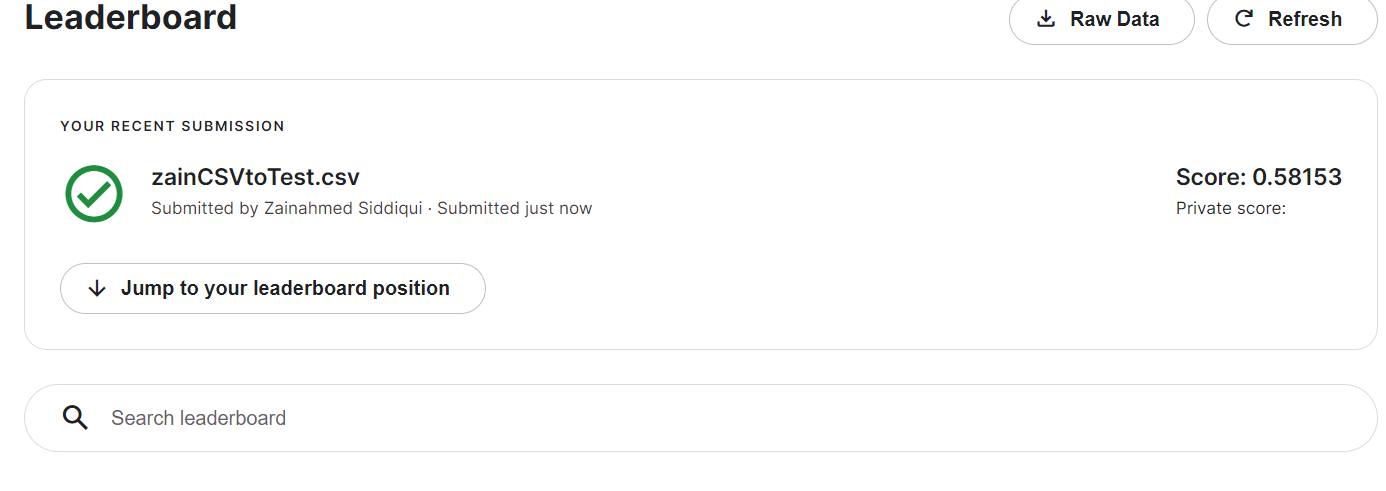 